## Датасет, содержащий информацию о пассажирах титаника

In [ ]:
import pandas as pd

In [ ]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv

--2024-03-21 10:50:08--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  58.89K  --.-KB/s    in 0.01s   

2024-03-21 10:50:08 (5.55 MB/s) - ‘titanic.csv’ saved [60302/60302]



In [ ]:
df = pd.read_csv('titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

## Обработка пропусков данных

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Удаление и заполнение нулями**

In [ ]:
new_df = df.dropna(axis = 1, how = 'any')
new_df.shape
#new_df.head()

(891, 9)

In [ ]:
new_df = df.dropna(axis = 0, how = 'any')
new_df.shape

(183, 12)

In [ ]:
new_df = df.fillna(0)
new_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df[df['Embarked'].isnull()].shape[0]

2

In [ ]:
str(df['Embarked'].dtype)

'object'

In [ ]:
new_df = df['Embarked']
new_df.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

In [ ]:
num_cols = []
for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0] #Количество пустых значений
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt == 'object'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / df.shape[0]) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка Age. Тип данных float64. Количество пустых значений 177, 19.87%.
Колонка Cabin. Тип данных object. Количество пустых значений 687, 77.1%.
Колонка Embarked. Тип данных object. Количество пустых значений 2, 0.22%.


## Кодирование категорий целочисленными значениями

В этом случае уникальные значения категориального признака кодируются целыми числами.

В scikit-learn для такого кодирования используется два класса :

LabelEncoder - который ориентирован на применение к одному признаку. Этот класс прежде всего предназначен для кодирования целевого признака, но может быть также использован для последовательного кодирования отдельных нецелевых признаков.
OrdinalEncoder - который ориентирован на применение к матрице объект-признак, то есть для кодирования матрицы нецелевых признаков.

### Использование LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
le = LabelEncoder()
df_le = le.fit_transform(df['Sex'])
df_le

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [ ]:
le.classes_

array(['female', 'male'], dtype=object)

## Кодирование категорий наборами бинарных значений - one-hot encoding

В этом случае каждое уникальное значение признака становится новым отдельным признаком.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
df_ohe = ohe.fit_transform(df[['Sex']])
df_ohe.todense()

matrix([[0., 1.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [0., 1.]])

In [ ]:
pd.get_dummies(df['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


## Target encoding

Целевое кодирование (также называемое средним кодированием) – это метод, при котором количество вхождений категориальной переменной учитывается вместе с целевой переменной для кодирования категориальных переменных в числовые значения. По сути, это процесс, в котором мы заменяем категориальную переменную средним значением целевой переменной.

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 661.4 kB/s eta 0:00:00


In [ ]:
#from sklearn.preprocessing import TargetEncoder
from category_encoders import TargetEncoder

In [ ]:
te = TargetEncoder()
temp_df = pd.DataFrame()
temp_df["Sex"] = df["Sex"]
temp_df["Survived"] = df["Survived"]
temp_df["Encoded_SEX"] = te.fit_transform(df['Sex'],df['Survived'])
temp_df

,Sex,Survived,Encoded_SEX
0,male,0,0.188908
1,female,1,0.742038
2,female,1,0.742038
3,female,1,0.742038
4,male,0,0.188908
...,...,...,...
886,male,0,0.188908
887,female,1,0.742038
888,female,0,0.742038
889,male,1,0.188908


## Масштабирование

Масштабирование предполагает изменение диапазона измерения величины.

Если признаки лежат в различных диапазонах, то необходимо их нормализовать. Как правило, применяют два подхода:

*   MinMax масштабирование: в этом случае значения лежат в диапазоне от 0 до 1.
*  Масштабирование данных на основе Z-оценки: в этом случае большинство значений попадает в диапазон от -3 до 3.





In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

**MinMax масштабирование**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
mms = MinMaxScaler()
df_mms = mms.fit_transform(df[['Fare']])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

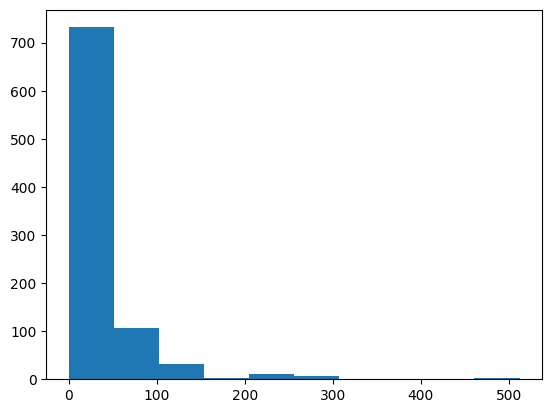

In [ ]:
plt.hist(df['Fare'])

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

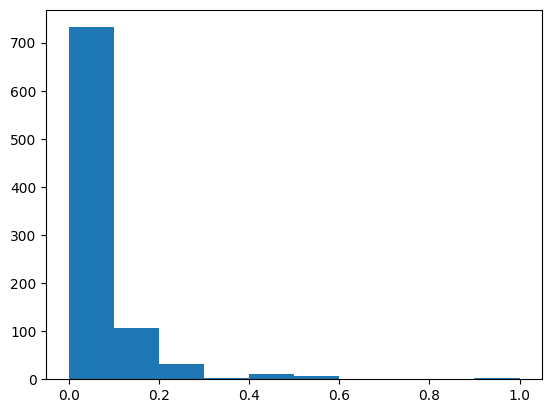

In [ ]:
plt.hist(df_mms)